# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt
import os

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 7 # 5 increase n 
label_name = "stat3"
layers = [7, 2] #[7, 2]

epochs = 1000 # increase epochs until curve flattens
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
os.makedirs('models', exist_ok=True)
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 43.20017194747925
Epoch 1, Loss 42.9567528963089
Epoch 2, Loss 42.76288205385208
Epoch 3, Loss 42.50197595357895
Epoch 4, Loss 42.49793690443039
Epoch 5, Loss 42.11471092700958
Epoch 6, Loss 41.896265625953674
Epoch 7, Loss 41.380328714847565
Epoch 8, Loss 41.29804199934006
Epoch 9, Loss 40.96247363090515
Epoch 10, Loss 40.4947566986084
Epoch 11, Loss 40.015127420425415
Epoch 12, Loss 39.481876611709595
Epoch 13, Loss 39.25132471323013
Epoch 14, Loss 38.44718191027641
Epoch 15, Loss 38.24434447288513
Epoch 16, Loss 37.63302806019783
Epoch 17, Loss 37.24257045984268
Epoch 18, Loss 36.59603914618492
Epoch 19, Loss 36.34905198216438
Epoch 20, Loss 35.94074732065201
Epoch 21, Loss 35.707195699214935
Epoch 22, Loss 35.48287597298622
Epoch 23, Loss 35.04503047466278
Epoch 24, Loss 34.68084082007408
Epoch 25, Loss 34.7092467546463
Epoch 26, Loss 34.05025213956833
Epoch 27, Loss 34.16175255179405
Epoch 28, Loss 34.053861171007156
Epoch 29, Loss 33.990534007549286
Epoch 30, Loss 3

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

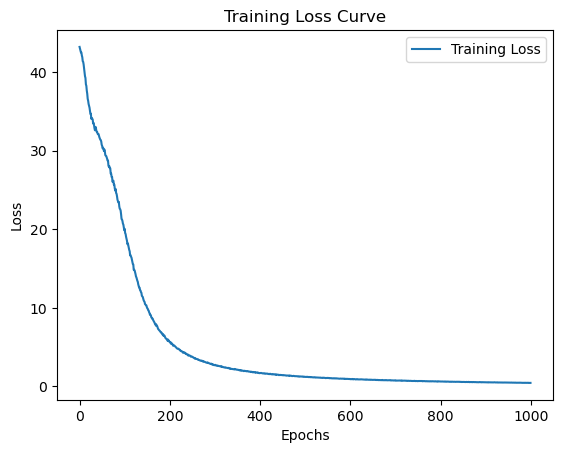

In [5]:
# Create directory for saving figures if it doesn't exist
os.makedirs('figures', exist_ok=True)
# Plot and save the loss curve
plt.figure()
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.savefig(f'figures/{label_name}_loss_curve.png')
plt.show()

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[3859, 0], [0, 173]]
Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


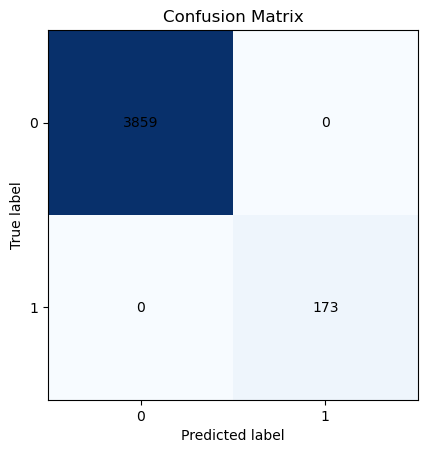

In [6]:
confusion_matrix = evaluate_model(model, training_dataset)
print(confusion_matrix)
confusion_matrix.print_accuracy()
confusion_matrix.plot()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

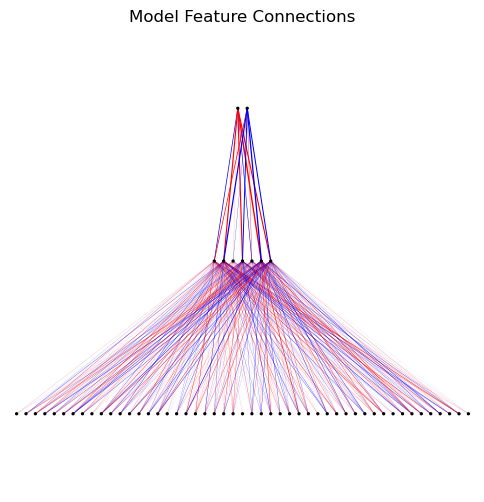

In [7]:
model.plot_connections()

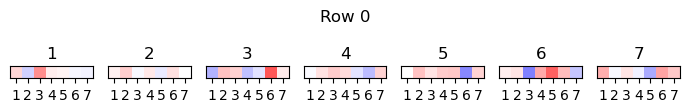

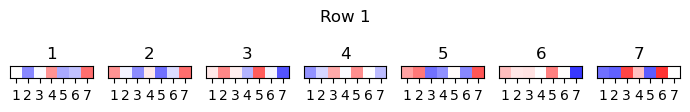

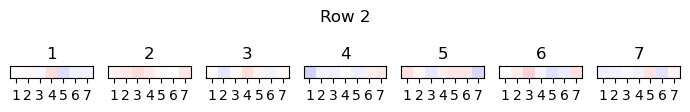

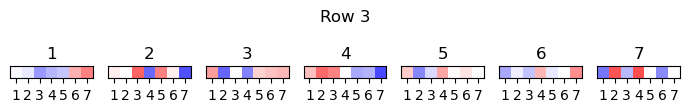

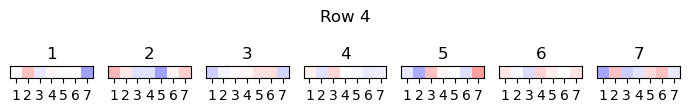

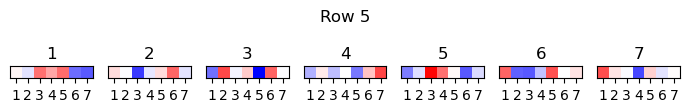

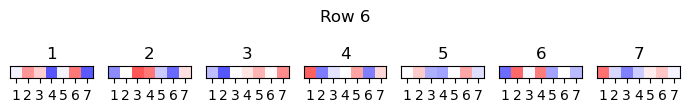

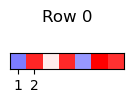

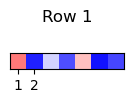

In [8]:
model.plot_heatmap_feature(0,0)
model.plot_heatmap_feature(0,1)
model.plot_heatmap_feature(0,2)
model.plot_heatmap_feature(0,3)
model.plot_heatmap_feature(0,4)
model.plot_heatmap_feature(0,5)
model.plot_heatmap_feature(0,6)
model.plot_heatmap_feature(1,0)
model.plot_heatmap_feature(1,1)


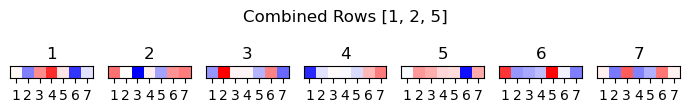

In [9]:
model.plot_combined_heatmap(layer=0, indices=[1, 2, 5])

In [10]:
#model.plot_heatmap_feature(1,0)
#model.plot_heatmap_feature(1,1)

#model.plot_heatmap_feature(0,4)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Model accuracy: 96.03174603174604%


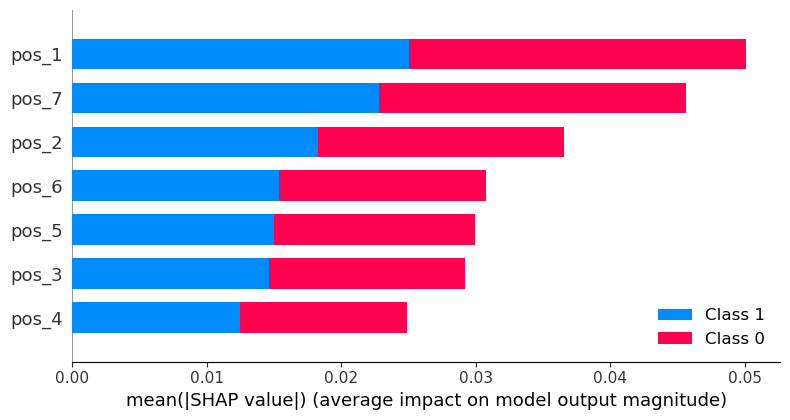

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import shap

# Load the original dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
df = pd.read_csv(file_path)

# Preprocess data
X = df['permutation'].apply(lambda x: [int(d) for d in x.strip("()").split(", ")]).tolist()
y = df['stat3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays for SHAP
X_train = np.array(X_train)
X_test = np.array(X_test)

# Train a simple model for interpretability
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100}%")

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Plot the SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test[0,:])

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=[f"pos_{i+1}" for i in range(X_train.shape[1])])


Model accuracy: 96.42857142857143%


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


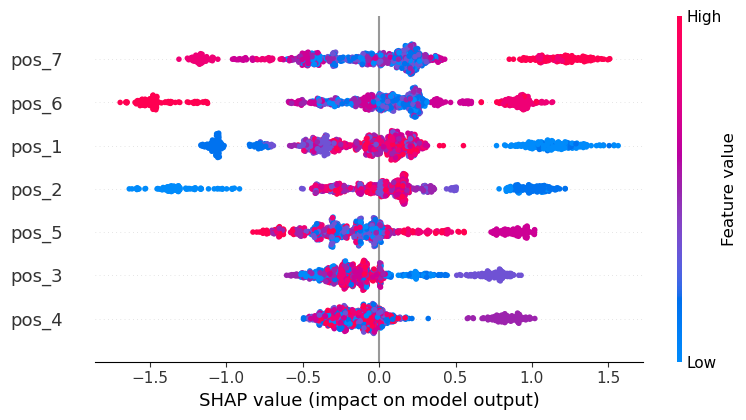

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import shap

# Load the original dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
df = pd.read_csv(file_path)

# Preprocess data
X = df['permutation'].apply(lambda x: [int(d) for d in x.strip("()").split(", ")]).tolist()
y = df['stat3'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to numpy arrays for SHAP
X_train = np.array(X_train)
X_test = np.array(X_test)

# Train a Gradient Boosting model for interpretability
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100}%")

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Handle different dimensions of shap_values
if isinstance(shap_values, list):
    shap_values = shap_values[0]

# Plot the SHAP values for the first prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test[0])

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=[f"pos_{i+1}" for i in range(X_train.shape[1])])


In [13]:
import pandas as pd

# Load the original dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
df = pd.read_csv(file_path)

# Function to check if odd and even digits are in increasing order
def check_increasing_order(permutation):
    digits = [int(x) for x in permutation.strip("()").split(", ")]
    odd_digits = digits[::2]
    even_digits = digits[1::2]
    return 1 if odd_digits == sorted(odd_digits) and even_digits == sorted(even_digits) else 0

# Apply the rule to compute stat3
df['computed_stat3'] = df['permutation'].apply(check_increasing_order)

# Identify the data that do not fit the rule
mismatched_data = df[df['stat3'] != df['computed_stat3']]

# Print out the mismatched data
print(mismatched_data[['permutation', 'stat3', 'computed_stat3']])


                permutation  stat3  computed_stat3
5     (1, 2, 3, 4, 7, 6, 5)      1               0
13    (1, 2, 3, 6, 4, 7, 5)      0               1
14    (1, 2, 3, 6, 5, 4, 7)      1               0
16    (1, 2, 3, 6, 7, 4, 5)      1               0
21    (1, 2, 3, 7, 5, 6, 4)      1               0
...                     ...    ...             ...
4917  (7, 5, 6, 4, 2, 3, 1)      1               0
4985  (7, 6, 3, 4, 5, 2, 1)      1               0
4991  (7, 6, 3, 5, 4, 2, 1)      1               0
5009  (7, 6, 4, 3, 5, 2, 1)      1               0
5039  (7, 6, 5, 4, 3, 2, 1)      1               0

[225 rows x 3 columns]


In [14]:
import pandas as pd

# Load the original dataset
file_path = f"data/permutations_{n}.csv"  # Update the path accordingly
df = pd.read_csv(file_path)

# Function to check if odd and even digits are in increasing order
def check_increasing_order(perm):
    digits = [int(d) for d in perm.strip("()").split(", ")]
    odd_digits = digits[::2]
    even_digits = digits[1::2]
    return int(odd_digits == sorted(odd_digits) and even_digits == sorted(even_digits))

# Apply the rule to compute stat3
df['computed_stat3'] = df['permutation'].apply(check_increasing_order)

# Check if the rule is 100% correct
accuracy_stat3 = (df['stat3'] == df['computed_stat3']).mean()

print(f"Accuracy for stat3: {accuracy_stat3 * 100}%")

Accuracy for stat3: 95.53571428571429%
